# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
page_soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
rows = page_soup.find_all('tr')

# Display the extracted rows
for row in rows:
    print(row)

<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [13]:
# Create an empty list
data_rows = []

# Loop through the scraped data to create a list of rows
for row in rows:
    columns = row.find_all('td')  # Assuming that each data point is contained within <td> tags
    data = [column.get_text(strip=True) for column in columns]
    data_rows.append(data)
    


In [14]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

df = pd.DataFrame(data_rows, columns=column_names)

In [15]:
# Confirm DataFrame was created successfully
print(df.head())

     id terrestrial_date   sol    ls month min_temp pressure
0  None             None  None  None  None     None     None
1     2       2012-08-16    10   155     6    -75.0    739.0
2    13       2012-08-17    11   156     6    -76.0    740.0
3    24       2012-08-18    12   156     6    -76.0    741.0
4    35       2012-08-19    13   157     6    -74.0    732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [16]:
# Examine data type of each column
print("Original Data Types:")
print(df.dtypes)

Original Data Types:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [19]:
# Change data types for data analysis

# Convert specific columns to appropriate data types
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Handle non-integer values in the 'sol' column
df['sol'] = pd.to_numeric(df['sol'], errors='coerce').astype(pd.Int64Dtype())

df['ls'] = pd.to_numeric(df['ls'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce').astype(pd.Int64Dtype())
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

# Examine updated data types of each column
print("\nUpdated Data Types:")
print(df.dtypes)




Updated Data Types:
id                          object
terrestrial_date    datetime64[ns]
sol                          Int64
ls                         float64
month                        Int64
min_temp                   float64
pressure                   float64
dtype: object


In [20]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          Int64
ls                         float64
month                        Int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [21]:
# 1. How many months are there on Mars?
# Calculate the number of unique months on Mars
num_unique_months = df['month'].nunique()

print(f"There are {num_unique_months} months on Mars.")


There are 12 months on Mars.


In [22]:
# 2. How many Martian days' worth of data are there?
num_unique_sols = df['sol'].nunique()

print(f"There are {num_unique_sols} Martian days' worth of data in the dataset.")


There are 1867 Martian days' worth of data in the dataset.


In [23]:
# 3. What is the average low temperature by month?
avg_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the result
print("Average Low Temperature by Month:")
print(avg_low_temp_by_month)


Average Low Temperature by Month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


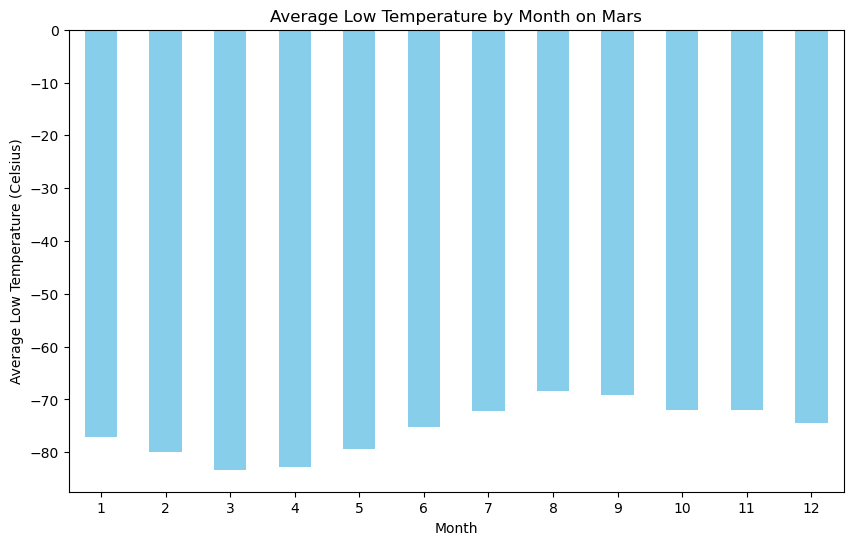

In [24]:
# Plot the average temperature by month


# Calculate the average low temperature by month
avg_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
avg_low_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(rotation=0)
plt.show()


In [25]:
# Identify the coldest and hottest months in Curiosity's location
avg_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = avg_low_temp_by_month.idxmin()
hottest_month = avg_low_temp_by_month.idxmax()

print(f"The coldest month is Month {coldest_month} with an average low temperature of {avg_low_temp_by_month[coldest_month]:.2f} Celsius.")
print(f"The hottest month is Month {hottest_month} with an average low temperature of {avg_low_temp_by_month[hottest_month]:.2f} Celsius.")


The coldest month is Month 3 with an average low temperature of -83.31 Celsius.
The hottest month is Month 8 with an average low temperature of -68.38 Celsius.


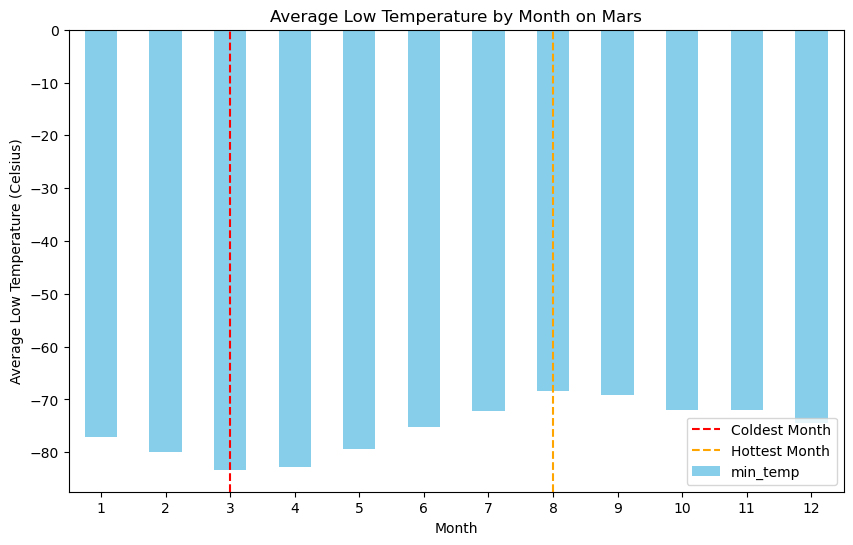

In [26]:
Plotting below

# Calculate the average low temperature by month
avg_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = avg_low_temp_by_month.idxmin()
hottest_month = avg_low_temp_by_month.idxmax()

# Create a bar chart
plt.figure(figsize=(10, 6))
avg_low_temp_by_month.plot(kind='bar', color='skyblue')
plt.axvline(x=coldest_month - 1, color='red', linestyle='--', label='Coldest Month')
plt.axvline(x=hottest_month - 1, color='orange', linestyle='--', label='Hottest Month')
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(rotation=0)
plt.legend()
plt.show()


In [27]:
# 4. Average pressure by Martian month
# Calculate the average atmospheric pressure by month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the result
print("Average Atmospheric Pressure by Martian Month:")
print(avg_pressure_by_month)


Average Atmospheric Pressure by Martian Month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


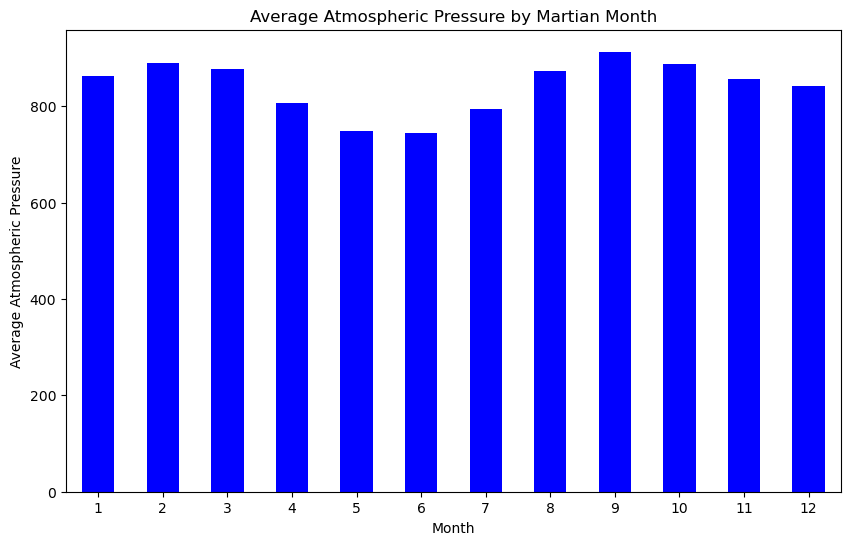

In [29]:
# Plot the average pressure by month


# Calculate the average atmospheric pressure by month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='blue')
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.xticks(rotation=0)
plt.show()


There are approximately 779.96 terrestrial days in a Martian year.


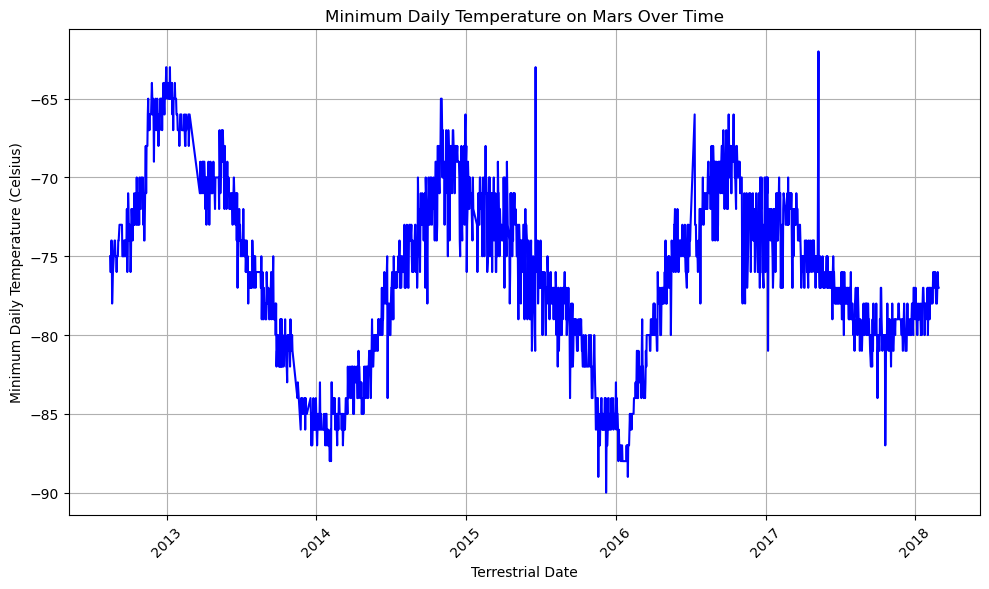

In [32]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Orbital period of Mars (in Earth days)
mars_orbital_period = 687

# Time between successive oppositions (in Earth days)
synodic_period = 779.96

# Calculate the number of terrestrial days in a Martian year
earth_days_in_martian_year = synodic_period

print(f"There are approximately {earth_days_in_martian_year:.2f} terrestrial days in a Martian year.")


import matplotlib.pyplot as plt

# Plot the minimum daily temperature over time
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], color='blue')
plt.title('Minimum Daily Temperature on Mars Over Time')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Daily Temperature (Celsius)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [33]:
# Write the data to a CSV
# Export the DataFrame to a CSV file
df.to_csv('mars_data.csv', index=False)

print("Data has been exported to mars_data.csv")


Data has been exported to mars_data.csv


In [34]:
browser.quit()